In [70]:
# aus https://github.com/open-source-modelling/one_factor_Hull_White_python/tree/main
# dX[t] = (alpha[t] + beta * X[t])*dt + sigma dW[t]
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  


def simulate_Hull_White_One_Factor(r0: float , a: float, sigma: float, T,N, f) ->pd.DataFrame:
    def const_forwards(value: float, N: int) -> np.array:
      "constante forward rates"
      return np.full(N, value)

    def timepoints(T: int, N: int) -> np.array:
      """
      Diskretisierung
      """
      return np.linspace(0, T, N)

    t = timepoints(T, N)
    f_1 = const_forwards(f, N)
    e = np.zeros(N)
    v = np.zeros(N)
    r = np.ones(N) * r0
    alpha = f_1 + sigma**2/(2*a**2)*(1-np.exp(-a*t))**2
    for el in range(1, N):
      deltat = t[el] - t[el-1]
      e[el] = r[el-1] * np.exp(-a*deltat) + alpha[el] - alpha[el-1] * np.exp(-a*deltat)
      v[el] = sigma**2/(2*a) * (1 - np.exp(-2*a*deltat))
      r[el] = np.random.normal(e[el], np.sqrt(v[el]))
    
    dict = {'Time' : t, 'Interest Rate' : r}
    interest_rate_simulation = pd.DataFrame.from_dict(data = dict)
    interest_rate_simulation.set_index('Time', inplace = True)
    return interest_rate_simulation
     

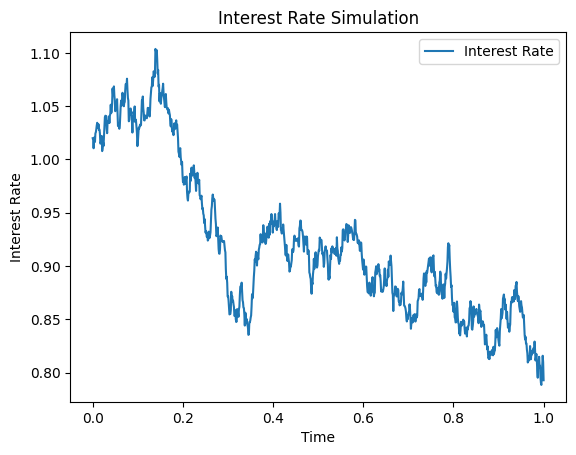

/tmp/ipykernel_59826/3784910289.py:22: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  int = simps(rt['Interest Rate'], rt.index)
/tmp/ipykernel_59826/3784910289.py:49: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  integral = simps(y_values, x_values)


Bond Price: 0.39831506094772645
Spot rate: 0.9205119764345504
Forward rate: 3.821590154951716


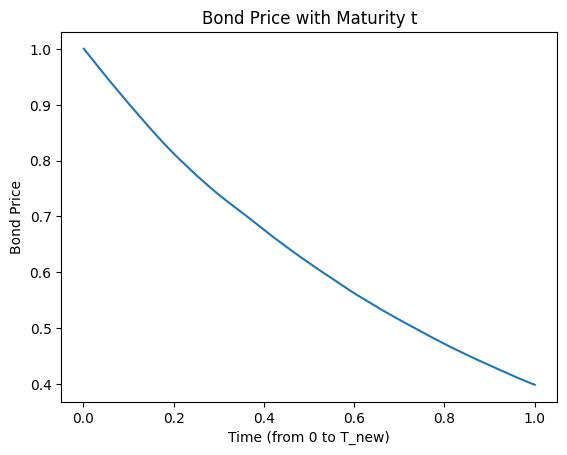

In [74]:

#fixing the Parameters
T=1
sigma = 0.2
beta = 0.04
X0 = 0.02
l = 1
lamda= 1
N=1000

rt = l + lamda * simulate_Hull_White_One_Factor(X0, beta, sigma, T, N, 0.03)

# Plot the interest rate simulation
rt.plot()
plt.xlabel('Time')
plt.ylabel('Interest Rate')
plt.title('Interest Rate Simulation')
plt.show()


from scipy.integrate import simps

# Compute the integral of the interest rates
int = simps(rt['Interest Rate'], rt.index)

# Compute Bond Price
result = np.exp(-int)
print(f"Bond Price: {result}")

# Spot rate

average_interest_rate = int / T
print(f"Spot rate: {average_interest_rate}")

# Forward rate
forward_rate = (1 + average_interest_rate) ** T / result - 1
print(f"Forward rate: {forward_rate}")


bond_prices = []
time_points = np.linspace(0, T, N)  # Generate time points from 0 to T_new

for t_idx in range(1, len(time_points)):
    # Slice up to the current time index
    cut_out_new = rt.iloc[:t_idx]
    
    y_values = cut_out_new['Interest Rate']
    x_values = time_points[:t_idx]  # Ensure x-values match the sliced data
    
    # Compute the integral of interest rates
    integral = simps(y_values, x_values)
    
    # Compute bond price as exp(-integral)
    result = np.exp(-integral)
    
    bond_prices.append(result)

# Plot the bond prices over time
plt.plot(time_points[1:], bond_prices)
plt.xlabel('Time (from 0 to T)')
plt.ylabel('Bond Price')
plt.title('Bond Price with Maturity t')
plt.show()




/tmp/ipykernel_59826/1999485285.py:14: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  integral_new = simps(out_new['Interest Rate'], out_new.index)


Bond Price:1.025538218439568
spot rate: -0.012608782969401426
forward rate: -0.049336828272853794


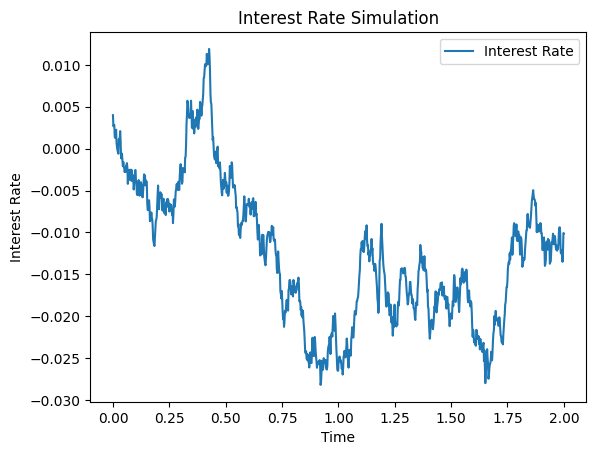

/tmp/ipykernel_59826/1999485285.py:48: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  integral = simps(y_values, x_values)


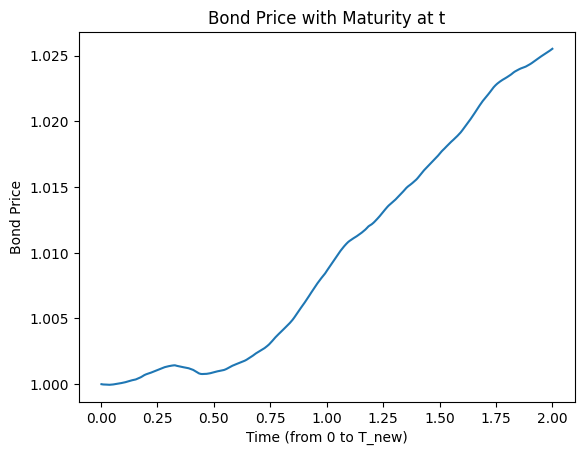

In [73]:
from scipy.integrate import simps

T_new=2
f_new=0.3
sigma_new = 0.1
beta_new = 0.05
X0_new = 0.02
l_new = 0
lbd_new = 0.2
N_new=1000

out_new = l_new + lbd_new * simulate_Hull_White_One_Factor(X0_new, beta_new, sigma_new, T_new, N_new, f_new)
# Compute the integral of the interest rates
integral_new = simps(out_new['Interest Rate'], out_new.index)

# Compute e^(-integral)
result_new = np.exp(-integral_new)
print(f"Bond Price:{result_new}")

average_interest_rate_new = integral_new / T_new
print(f"spot rate: {average_interest_rate_new}")

forward_rate_new = (1+average_interest_rate_new)**T_new / result_new - 1
print(f"forward rate: {forward_rate_new}")

# Plot the interest rate simulation
out_new.plot()
plt.xlabel('Time')
plt.ylabel('Interest Rate')
plt.title('Interest Rate Simulation')
plt.show()





bond_prices = []
time_points = np.linspace(0, T_new, N_new)  # Generate time points from 0 to T_new

for t_idx in range(1, len(time_points)):
    # Slice up to the current time index
    cut_out_new = out_new.iloc[:t_idx]
    
    y_values = cut_out_new['Interest Rate']
    x_values = time_points[:t_idx]  # Ensure x-values match the sliced data
    
    # Compute the integral of interest rates
    integral = simps(y_values, x_values)
    
    # Compute bond price as exp(-integral)
    result = np.exp(-integral)
    
    bond_prices.append(result)

# Plot the bond prices over time
plt.plot(time_points[1:], bond_prices)
plt.xlabel('Time (from 0 to T_new)')
plt.ylabel('Bond Price')
plt.title('Bond Price with Maturity at t')
plt.show()
